In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore')

In [2]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Verify the data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

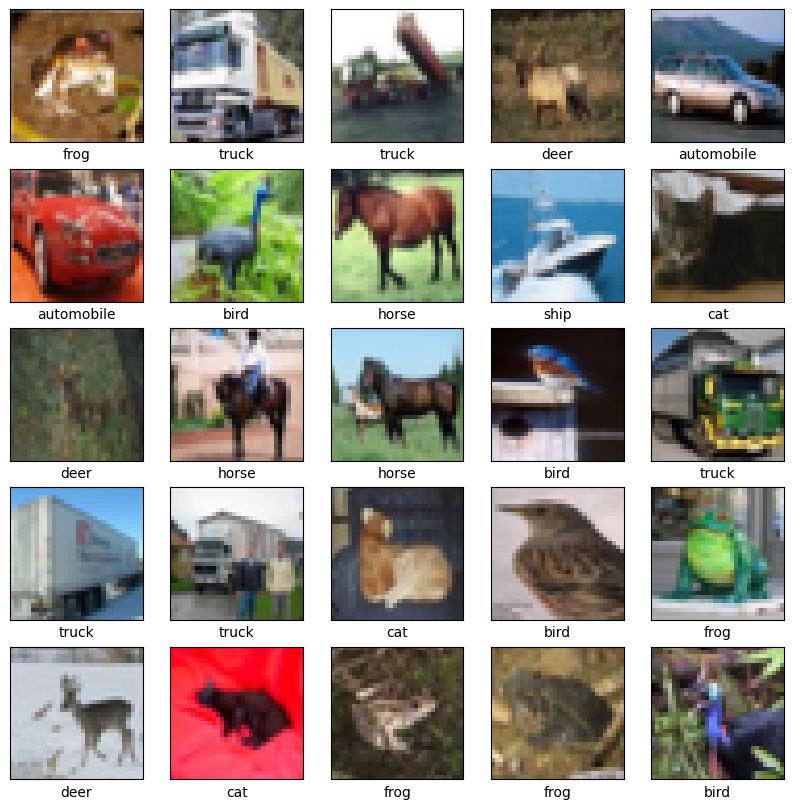

In [5]:
# Plot the first 25 images from the training set and display the class name below each image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [6]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 65ms/step - accuracy: 0.3599 - loss: 1.7300 - val_accuracy: 0.5355 - val_loss: 1.2951
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 66ms/step - accuracy: 0.5722 - loss: 1.1952 - val_accuracy: 0.6087 - val_loss: 1.0978
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 66ms/step - accuracy: 0.6348 - loss: 1.0264 - val_accuracy: 0.6395 - val_loss: 1.0238
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 75ms/step - accuracy: 0.6755 - loss: 0.9213 - val_accuracy: 0.6623 - val_loss: 0.9589
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 67ms/step - accuracy: 0.7065 - loss: 0.8359 - val_accuracy: 0.6770 - val_loss: 0.9426
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 70ms/step - accuracy: 0.7295 - loss: 0.7640 - val_accuracy: 0.6952 - val_loss: 0.8669
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 166s 85ms/step - accuracy: 0.7460 - loss: 0.7235 - val_accuracy: 0.6985 - val_loss: 0.8816
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 72ms/step - accuracy: 

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 5s - 16ms/step - accuracy: 0.7146 - loss: 0.8698

Test accuracy: 0.7146000266075134


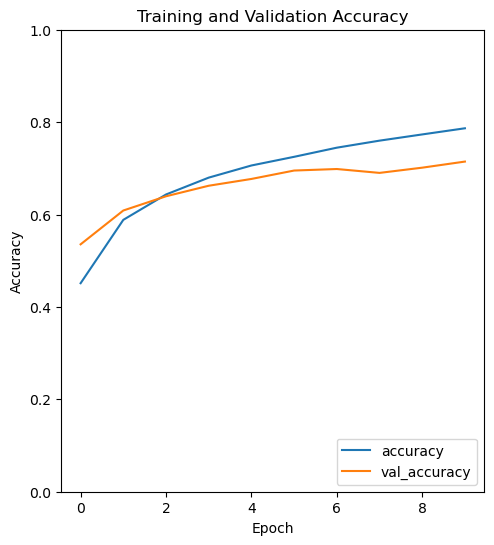

In [10]:
# Plot training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

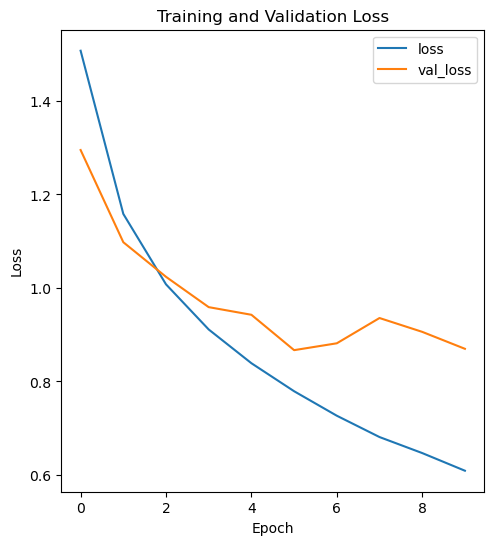

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
# Make predictions
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


In [13]:
# Verify predictions
import numpy as np

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label[0]]})", color=color)

In [14]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label[0]].set_color('blue')


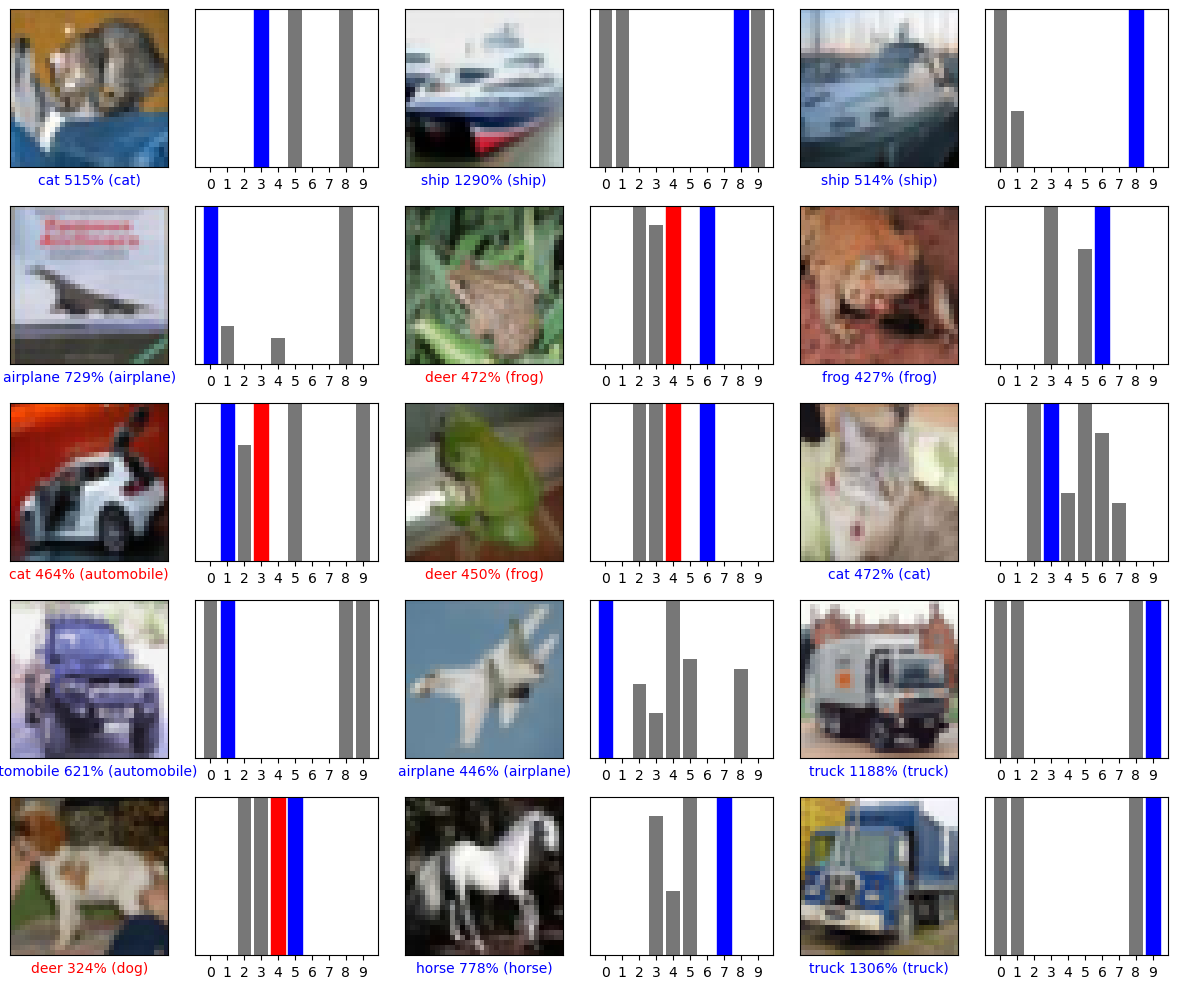

In [15]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()